In [355]:
# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
import acquire
import prepare
from scipy import stats
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline



4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

In [356]:
from pydataset import data

df_iris = data('iris')
type(df_iris)

pandas.core.frame.DataFrame

In [357]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [358]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [359]:
df_iris.shape

(150, 5)

In [360]:
df_iris.columns.dtype

dtype('O')

In [361]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [362]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [363]:
df_iris.describe().T
#.T transposes the table for better readability. personal choice

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


- - -

Read the data from this google sheet into a dataframe, df_google.

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [364]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [365]:
df_google.shape

(891, 12)

In [366]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [367]:
df_google.columns.to_list() #a bit more readable than the above

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [368]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [369]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [370]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [371]:
df_google = df_google.select_dtypes(exclude=['int', 'float'])
for col in df_google.columns:
    print(df_google[col].unique()) # to print categories name only
    print(df_google[col].value_counts()) # to print count of every category


['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

In [372]:
df_google.nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe
- df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [373]:
df_excel = pd.read_excel('train.xlsx', sheet_name='train') #name the file and sheet as arg for read_excel

In [374]:
df_excel.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [375]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [376]:
df_excel_sample = df_excel.head(100)

In [377]:
df_excel_sample.shape

(100, 12)

In [378]:
df_excel.shape[0]

891

In [379]:
df_excel_sample.shape[1]

12

In [380]:
df_excel.columns[0:5].to_list()

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex']

In [381]:
df_excel.select_dtypes(include='object').columns.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [382]:
#compute the range for each of the numeric variables

df_excel.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [383]:
titanic_stats = df_excel[['Age', 'Fare']].describe().T #assign the describe and assign to variable
titanic_stats

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [384]:
titanic_stats['range'] = titanic_stats['max'] - titanic_stats['min'] #create new column named range, max - min
titanic_stats

,count,mean,std,min,25%,50%,75%,max,range
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,79.5800
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,512.3292


## Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

2. Drop the species_id and measurement_id columns.

3. Rename the species_name column to just species.

4. Create dummy variables of the species name and       concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [385]:
iris_df = acquire.get_iris_data()

In [386]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [387]:
# 2. Drop the species_id and measurement_id columns.

iris_df = iris_df.drop(columns=['species_id'])
iris_df.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa


In [388]:
# 3. Rename the species_name column to just species.
iris_df=iris_df.rename(columns={'species_name':'species'})

In [389]:
iris_df.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [390]:
# 4. Create dummy variables of the species name and concatenate onto the iris dataframe. 
# (This is for practice, we don't always have to encode the target, but if we used species 
# as a feature, we would need to encode it).

species_dummies = pd.get_dummies(iris_df.species, drop_first=False)


In [391]:
species_dummies.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [392]:
iris_df = pd.concat([iris_df, species_dummies], axis=1)

In [393]:
iris_df.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,setosa,1,0,0


In [394]:
# 5. Create a function named prep_iris that accepts the untransformed iris data, and 
# returns the data with the transformations above applied.

def prep_iris(iris):
    iris = iris_df.drop(columns=['species_id'])
    iris_df=iris_df.rename(columns={'species_name':'species'})
    species_dummies = pd.get_dummies(iris_df.species, drop_first=True)
    iris_df = pd.concat([iris_df, species_dummies], axis=1)
    return iris_df


In [395]:
def prep_iris(iris):
    iris = iris.drop(columns=['species_id'])
    iris.rename(columns={'species_name': 'species'}, inplace=True)
    species_encoded = pd.get_dummies(iris.species, drop_first=False)
    iris = pd.concat([iris, species_encoded], axis=1)
    return iris

In [396]:
prep_iris(acquire.get_iris_data()).head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,setosa,1,0,0


## Using the Titanic dataset

1. Use the function defined in acquire.py to load the Titanic data.

2. Drop any unnecessary, unhelpful, or duplicated columns.

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [397]:
titanic_df = acquire.get_titanic_data()

In [398]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [399]:
titanic_df.info() #looking for unneccessary, unhelpful or duplicated columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [400]:
#deck column has too many non-nulls, drop this column
titanic_df = titanic_df.drop(columns=['deck'])

In [401]:
#3. Encode the categorical columns. Create dummy variables 
# of the categorical columns and concatenate them onto the 
# dataframe.

dummies = pd.get_dummies(titanic_df[['embark_town', 'sex']], drop_first=True)
titanic_df = pd.concat([titanic_df, dummies], axis=1)


In [402]:
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,0,1,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,0,1,0
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,0,1,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,Southampton,1,0,1,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,Southampton,1,0,1,0
888,888,0,3,female,NaN,1,2,23.4500,S,Third,Southampton,0,0,1,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,Cherbourg,1,0,0,1


In [403]:
# 4. Create a function named prep_titanic that accepts the 
# raw titanic data, and returns the data with the transformations
# above applied.

titanic_df.isna().sum()

passenger_id                 0
survived                     0
pclass                       0
sex                          0
age                        177
sibsp                        0
parch                        0
fare                         0
embarked                     2
class                        0
embark_town                  2
alone                        0
embark_town_Queenstown       0
embark_town_Southampton      0
sex_male                     0
dtype: int64

In [404]:
titanic_df = titanic_df.drop(columns='age')

In [405]:
titanic_df.isna().sum()

passenger_id               0
survived                   0
pclass                     0
sex                        0
sibsp                      0
parch                      0
fare                       0
embarked                   2
class                      0
embark_town                2
alone                      0
embark_town_Queenstown     0
embark_town_Southampton    0
sex_male                   0
dtype: int64

In [406]:
def prep_titanic(titanic_df):
    titanic_df = titanic_df = titanic_df.drop(columns=['deck', 'age'])
    dummies = pd.get_dummies(titanic_df[['embark_town', 'sex']], drop_first=True)
    titanic_df = pd.concat([titanic_df, dummies], axis=1)
    return titanic_df
    

## Using the Telco dataset

1. Use the function defined in acquire.py to load the Telco data.

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [407]:
telco_df = acquire.get_telco_data()

In [408]:
telco_df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [409]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [410]:
telco_df.payment_type

0           Mailed check
1           Mailed check
2       Electronic check
3       Electronic check
4           Mailed check
              ...       
7038        Mailed check
7039    Electronic check
7040        Mailed check
7041        Mailed check
7042    Electronic check
Name: payment_type, Length: 7043, dtype: object

In [411]:
telco_df.payment_type_id

0       2
1       2
2       1
3       1
4       2
       ..
7038    2
7039    1
7040    2
7041    2
7042    1
Name: payment_type_id, Length: 7043, dtype: int64

In [412]:
# 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key 
# columns but keeping the corresponding string values, for example.

#using crosstab to compare values of columns that may be referring to the same data
pd.crosstab(telco_df.payment_type, telco_df.payment_type_id)



payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [413]:
 # payment type, contract type, and internet service type all have duplicate columns with'%_id': remove those columns

 telco_df = telco_df.drop(columns = ['payment_type_id', 'internet_service_type_id', 'contract_type_id'])

In [414]:
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [415]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [416]:
telco_df.total_charges.dtype

dtype('O')

In [417]:
telco_df.total_charges = (telco_df.total_charges + '0').astype('float')

In [418]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [419]:
telco_df.head()
#noting columns to encode:
#gender, partner, dependents, phone_service, multiple_lines, online_security, online_back_up, etc. There are too many to list here

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [420]:
#create a list of the columns I want to encode

cols_to_encode = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup',
                'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies','paperless_billing', 'churn', 
                'contract_type', 'internet_service_type', 'payment_type']

In [421]:
# for i in cols_to_encode:

# I like instructor's way of doing this better, I'll use it to learn this concept and apply in future projects

#initialize the lists of columns we want

categorical_cols = []
binary_categories = []
multi_categories = []
numerical_cols = []

#for loop to sort the columns in the df into the list's above

for col in telco_df:
    if telco_df[col].dtype == 'object':
        categorical_cols.append(col)
        if telco_df[col].value_counts().size > 2:
            multi_categories.append(col)
        else:
            binary_categories.append(col)
    else:
        numerical_cols.append(col)
    

In [422]:
# checking to make sure the lists have been created
categorical_cols
binary_categories
multi_categories
numerical_cols
#they're all there

#get dummies for categorical_cols
#convert to binary, binary_categories
#get dummies multi_categories
#numerical_cols leave alone as long as dtype is float or int




['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']

In [423]:
multi_categories
telco_df.customer_id #not needed, remove from list

multi_categories.remove('customer_id') 

In [424]:
multi_categories

['multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [425]:
#encode categorical_cols
#encode multi_categories

categorical_cols = pd.get_dummies(categorical_cols)

In [426]:
categorical_cols

,churn,contract_type,customer_id,dependents,device_protection,gender,internet_service_type,multiple_lines,online_backup,online_security,paperless_billing,partner,payment_type,phone_service,streaming_movies,streaming_tv,tech_support
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [427]:
multi_categories = pd.get_dummies(multi_categories)

In [428]:
multi_categories.head()

,contract_type,device_protection,internet_service_type,multiple_lines,online_backup,online_security,payment_type,streaming_movies,streaming_tv,tech_support
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [429]:
binary_categories

['gender',
 'partner',
 'dependents',
 'phone_service',
 'paperless_billing',
 'churn']

In [430]:
telco_df.gender = telco_df.gender.replace('Female',0)

In [431]:
telco_df.gender = telco_df.gender.replace('Male',1)

In [432]:
telco_df.gender.head()

0    0
1    1
2    1
3    1
4    0
Name: gender, dtype: int64

In [433]:
telco_df.dependents = telco_df.dependents.replace('Yes', 1).replace('No', 0)

In [434]:
telco_df.phone_service = telco_df.phone_service.replace('Yes', 1).replace('No', 0)

In [435]:
telco_df.paperless_billing = telco_df.paperless_billing.replace('Yes', 1).replace('No', 0)

In [436]:
telco_df.partner = telco_df.partner.replace('Yes', 1).replace('No',0)

In [437]:
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,0,0,1,1,9,1,No,No,Yes,...,Yes,Yes,No,1,65.6,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,1,0,0,0,9,1,Yes,No,No,...,No,No,Yes,0,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,1,0,0,0,4,1,No,No,No,...,No,No,No,1,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,1,1,1,0,13,1,No,No,Yes,...,No,Yes,Yes,1,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,0,1,1,0,3,1,No,No,No,...,Yes,Yes,No,1,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [438]:
telco_df.partner = telco_df.partner.replace('Yes', 1).replace('No',0)

In [439]:
# 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

def prep_telco(telco_df):

    # telco_df = acquire.get_telco_data()
    telco_df = telco_df.drop(columns = ['payment_type_id', 'internet_service_type_id', 'contract_type_id'])
    telco_df.total_charges = (telco_df.total_charges + '0').astype('float')

    categorical_cols = []
    binary_categories = []
    multi_categories = []
    numerical_cols = []

    for col in telco_df:
        if telco_df[col].dtype == 'object':
            categorical_cols.append(col)
        if telco_df[col].value_counts().size > 2:
            multi_categories.append(col)
        else:
            binary_categories.append(col)
    else:
        numerical_cols.append(col)

    telco_df.gender = telco_df.gender.replace('Male',1)
    telco_df.dependents = telco_df.dependents.replace('Yes', 1).replace('No', 0)
    telco_df.phone_service = telco_df.phone_service.replace('Yes', 1).replace('No', 0)
    telco_df.paperless_billing = telco_df.paperless_billing.replace('Yes', 1).replace('No', 0)
    telco_df.partner = telco_df.partner.replace('Yes', 1).replace('No',0)

    return telco_df

In [440]:
prepped_telco = prep_telco(acquire.get_telco_data())

## Split your data

1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [441]:
# first split to train and test
train, test = train_test_split(telco_df, train_size = 0.8, random_state=1349, stratify=telco_df.churn)

In [442]:
# then split to create validate
train, val = train_test_split(train, train_size = 0.7, random_state=1349, stratify=train.churn)

In [443]:
def split_data(df, target=''):
    train, test = train_test_split(df, 
                               train_size = 0.8,
                               random_state=1349,
                              stratify=df[target])
    train, val = train_test_split(train,
                             train_size = 0.7,
                             random_state=1349,
                             stratify=train[target])
    return train, val, test

In [444]:
iris_df.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,setosa,1,0,0


In [445]:
train_iris, validate_iris, test_iris = split_data(iris_df, target = 'species')

In [446]:
train_iris.shape, validate_iris.shape, test_iris.shape

((84, 9), (36, 9), (30, 9))

In [447]:
train_iris.size, validate_iris.size, test_iris.size

(756, 324, 270)

now do the same thing as above for titanic and telco datasets

In [448]:
# titanic_df
train_titanic, validate_titanic, test_titanic = split_data(titanic_df, target = 'class')

In [449]:
train_titanic.size, validate_titanic.size, test_titanic.size

(6972, 2996, 2506)

In [450]:
telco_df
train_telco, validate_telco, test_telco = split_data(telco_df, target = 'churn')

In [451]:
train_telco.size, validate_telco.size, test_telco.size

(82803, 35511, 29589)

- - -

- - -

# Exploratory Analysis exercises
### Part 1

1. Acquire, prepare & split your data.


In [452]:
iris = acquire.get_iris_data()
iris_prepped = prepare.prep_iris(iris)
iris_prepped.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,setosa,0,0
1,2,4.9,3.0,1.4,0.2,setosa,0,0
2,3,4.7,3.2,1.3,0.2,setosa,0,0
3,4,4.6,3.1,1.5,0.2,setosa,0,0
4,5,5.0,3.6,1.4,0.2,setosa,0,0


In [453]:
#split data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [454]:
train_iris.shape, validate_iris.shape, test_iris.shape

((84, 9), (36, 9), (30, 9))

In [455]:
train_iris.head()
train_iris = train_iris.drop(columns = ['measurement_id'])

In [456]:
validate_iris = validate_iris.drop(columns = ['measurement_id'])

In [457]:
test_iris = test_iris.drop(columns = ['measurement_id'])

In [458]:
train_iris.shape, validate_iris.shape, test_iris.shape

((84, 8), (36, 8), (30, 8))

In [459]:
train_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
138,6.0,3.0,4.8,1.8,virginica,0,0,1
7,5.0,3.4,1.5,0.2,setosa,1,0,0
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
74,6.4,2.9,4.3,1.3,versicolor,0,1,0
97,6.2,2.9,4.3,1.3,versicolor,0,1,0


## 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.


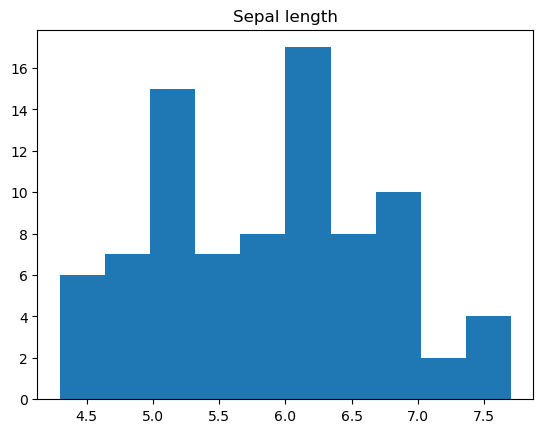

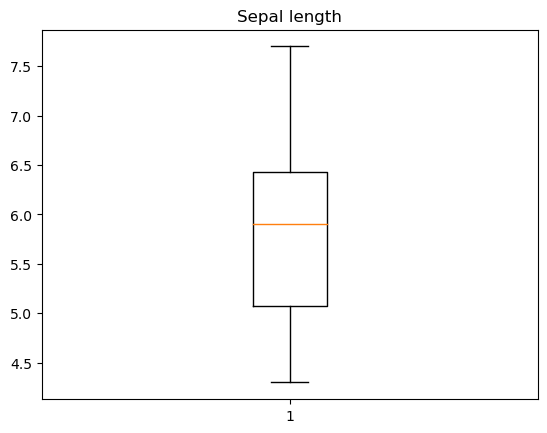

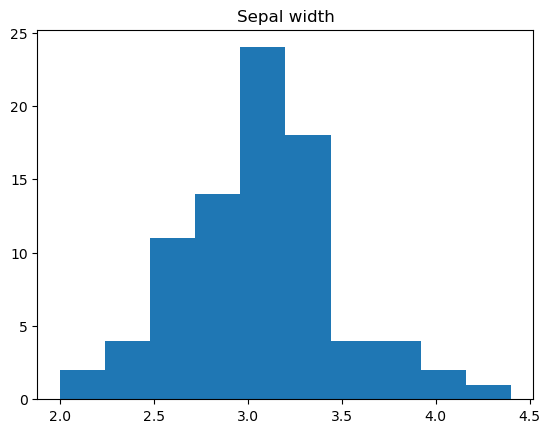

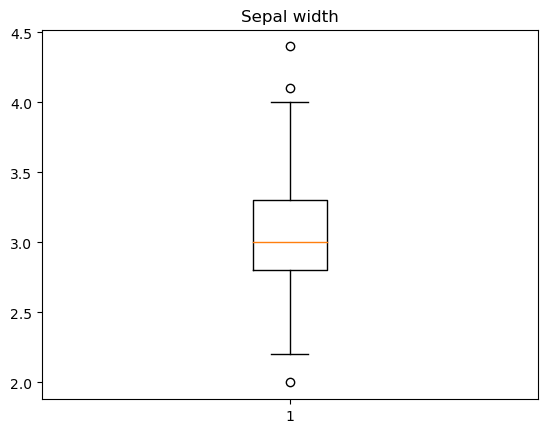

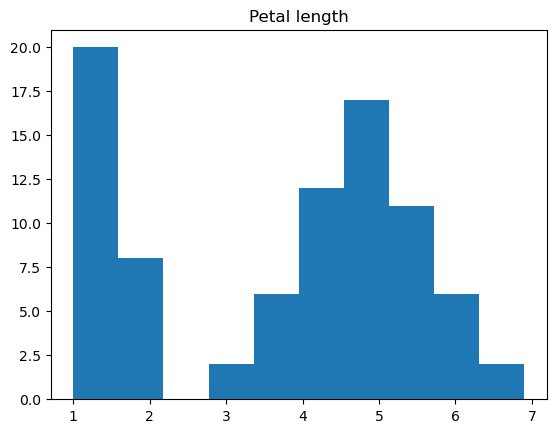

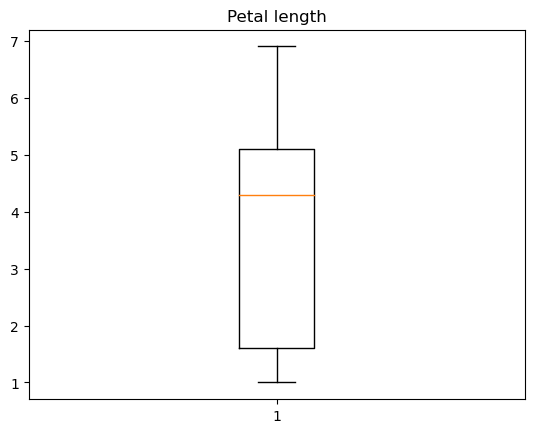

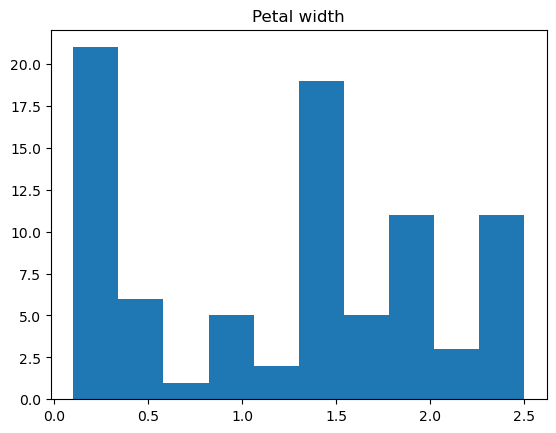

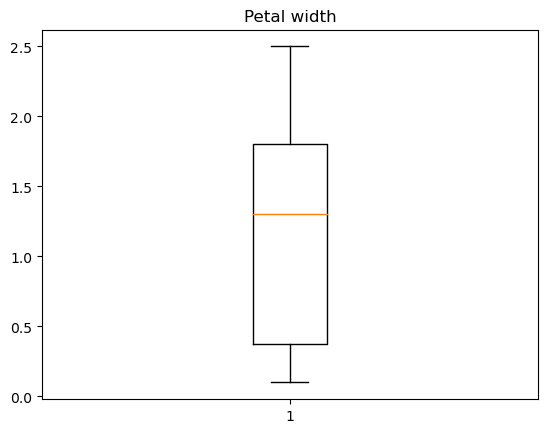

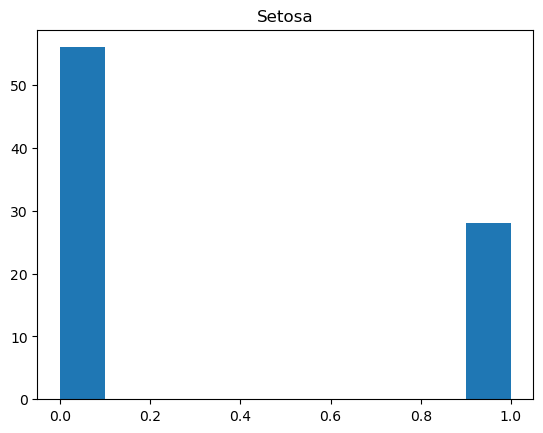

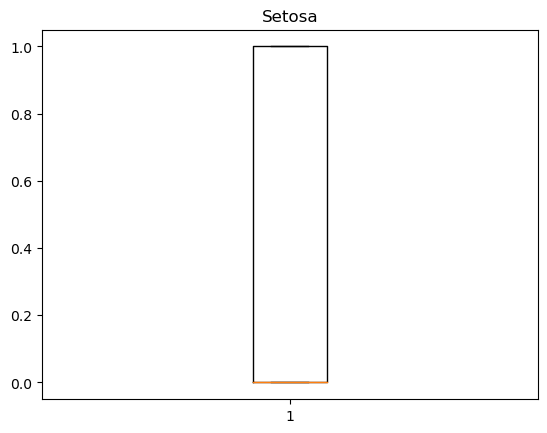

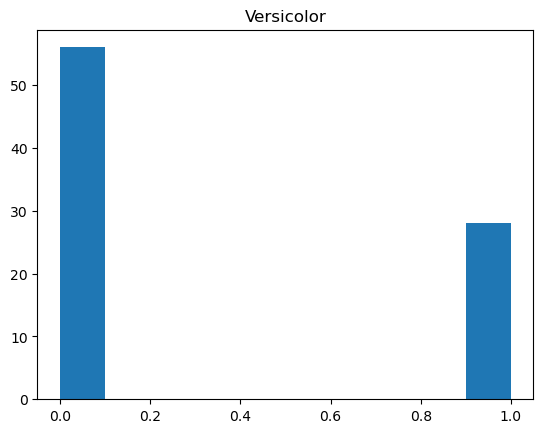

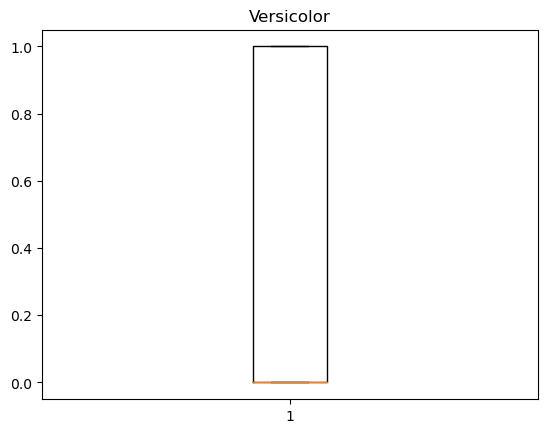

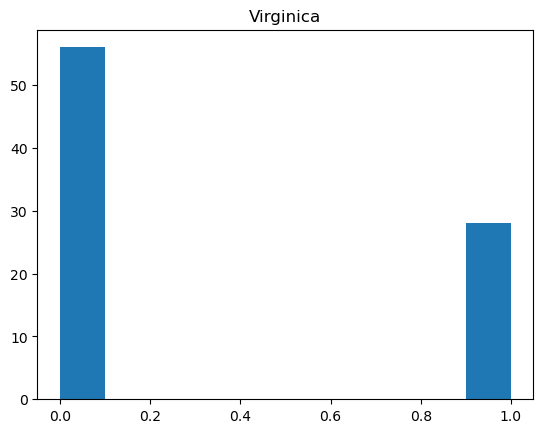

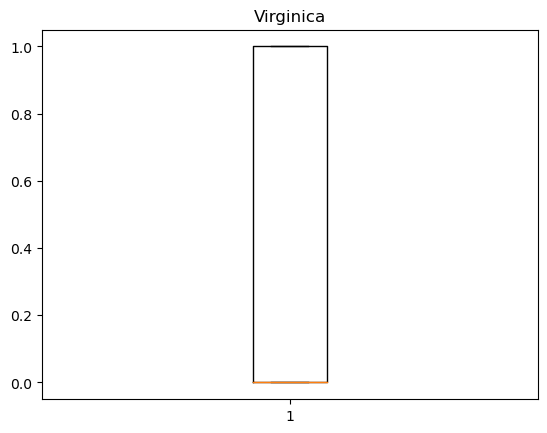

In [460]:
#make a for loop so I don't have to manually plot each combination

columns = train_iris.columns[[train_iris[col].dtype != 'object' for col in train_iris.columns]]
for col in columns:
    plt.hist(train_iris[col])
    plt.title(col.replace('_',' ').capitalize())
    plt.show()
    plt.boxplot(train_iris[col])
    plt.title(col.replace('_',' ').capitalize())
    plt.savefig(col + 'box.png')
    plt.show()

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

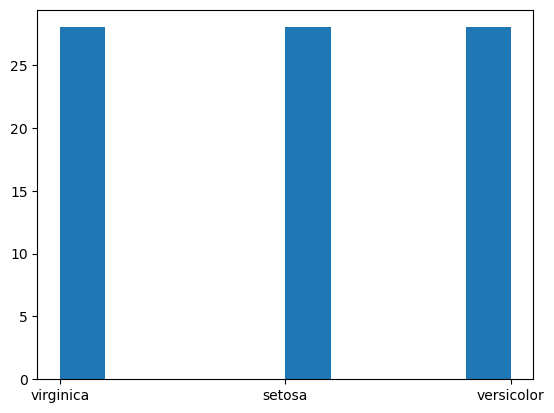

In [461]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

train_iris.head()
species_total = train_iris.species.value_counts()
species_total
plt.hist(train_iris.species)


3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.


In [462]:
train_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
138,6.0,3.0,4.8,1.8,virginica,0,0,1
7,5.0,3.4,1.5,0.2,setosa,1,0,0
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
74,6.4,2.9,4.3,1.3,versicolor,0,1,0
97,6.2,2.9,4.3,1.3,versicolor,0,1,0


-  Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

x-axis: species

y-axis: sepal_length, sepal_width, petal_length

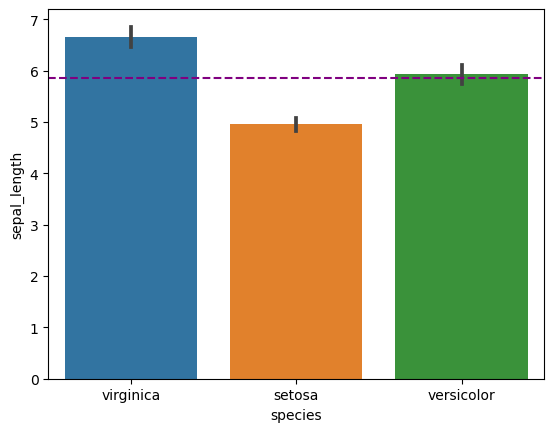

In [463]:
sns.barplot(x = 'species', y = 'sepal_length', data = train_iris)
mean_sepal_length = train_iris.sepal_length.mean()
plt.axhline(mean_sepal_length, label = 'Mean Sepal Length', color = 'purple', linestyle = '--')

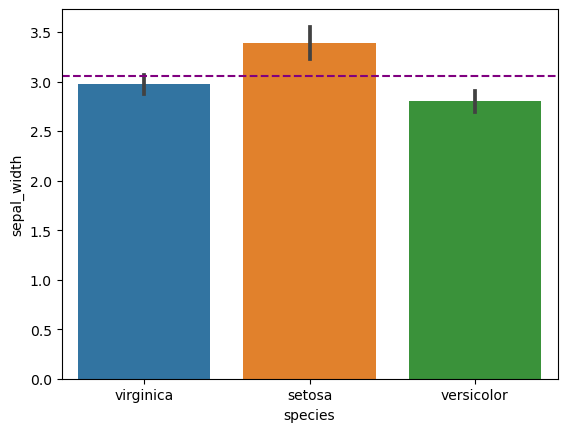

In [464]:
sns.barplot(x = 'species', y = 'sepal_width', data = train_iris)
mean_sepal_width = train_iris.sepal_width.mean()
plt.axhline(mean_sepal_width, label = 'Mean Sepal Width', color = 'purple', linestyle = '--')

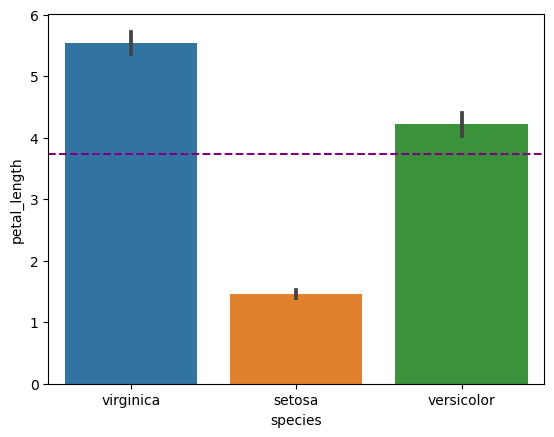

In [465]:
sns.barplot(x = 'species', y = 'petal_length', data = train_iris)
mean_petal_length = train_iris.petal_length.mean()
plt.axhline(mean_petal_length, label = 'Mean Petal Length', color = 'purple', linestyle = '--')

In [466]:
train_iris[train_iris.species == 'virginica'].describe()
train_iris[train_iris.species == 'setosa'].describe() 
train_iris[train_iris.species == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0,28.0
mean,5.935714,2.800000,4.217857,1.332143,0.0,1.0,0.0
std,0.512231,0.303071,0.522142,0.205577,0.0,0.0,0.0
min,5.000000,2.000000,3.000000,1.000000,0.0,1.0,0.0
25%,5.600000,2.700000,3.900000,1.275000,0.0,1.0,0.0
50%,6.000000,2.900000,4.300000,1.300000,0.0,1.0,0.0
75%,6.300000,3.000000,4.600000,1.500000,0.0,1.0,0.0
max,6.900000,3.400000,5.100000,1.700000,0.0,1.0,0.0


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.


4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

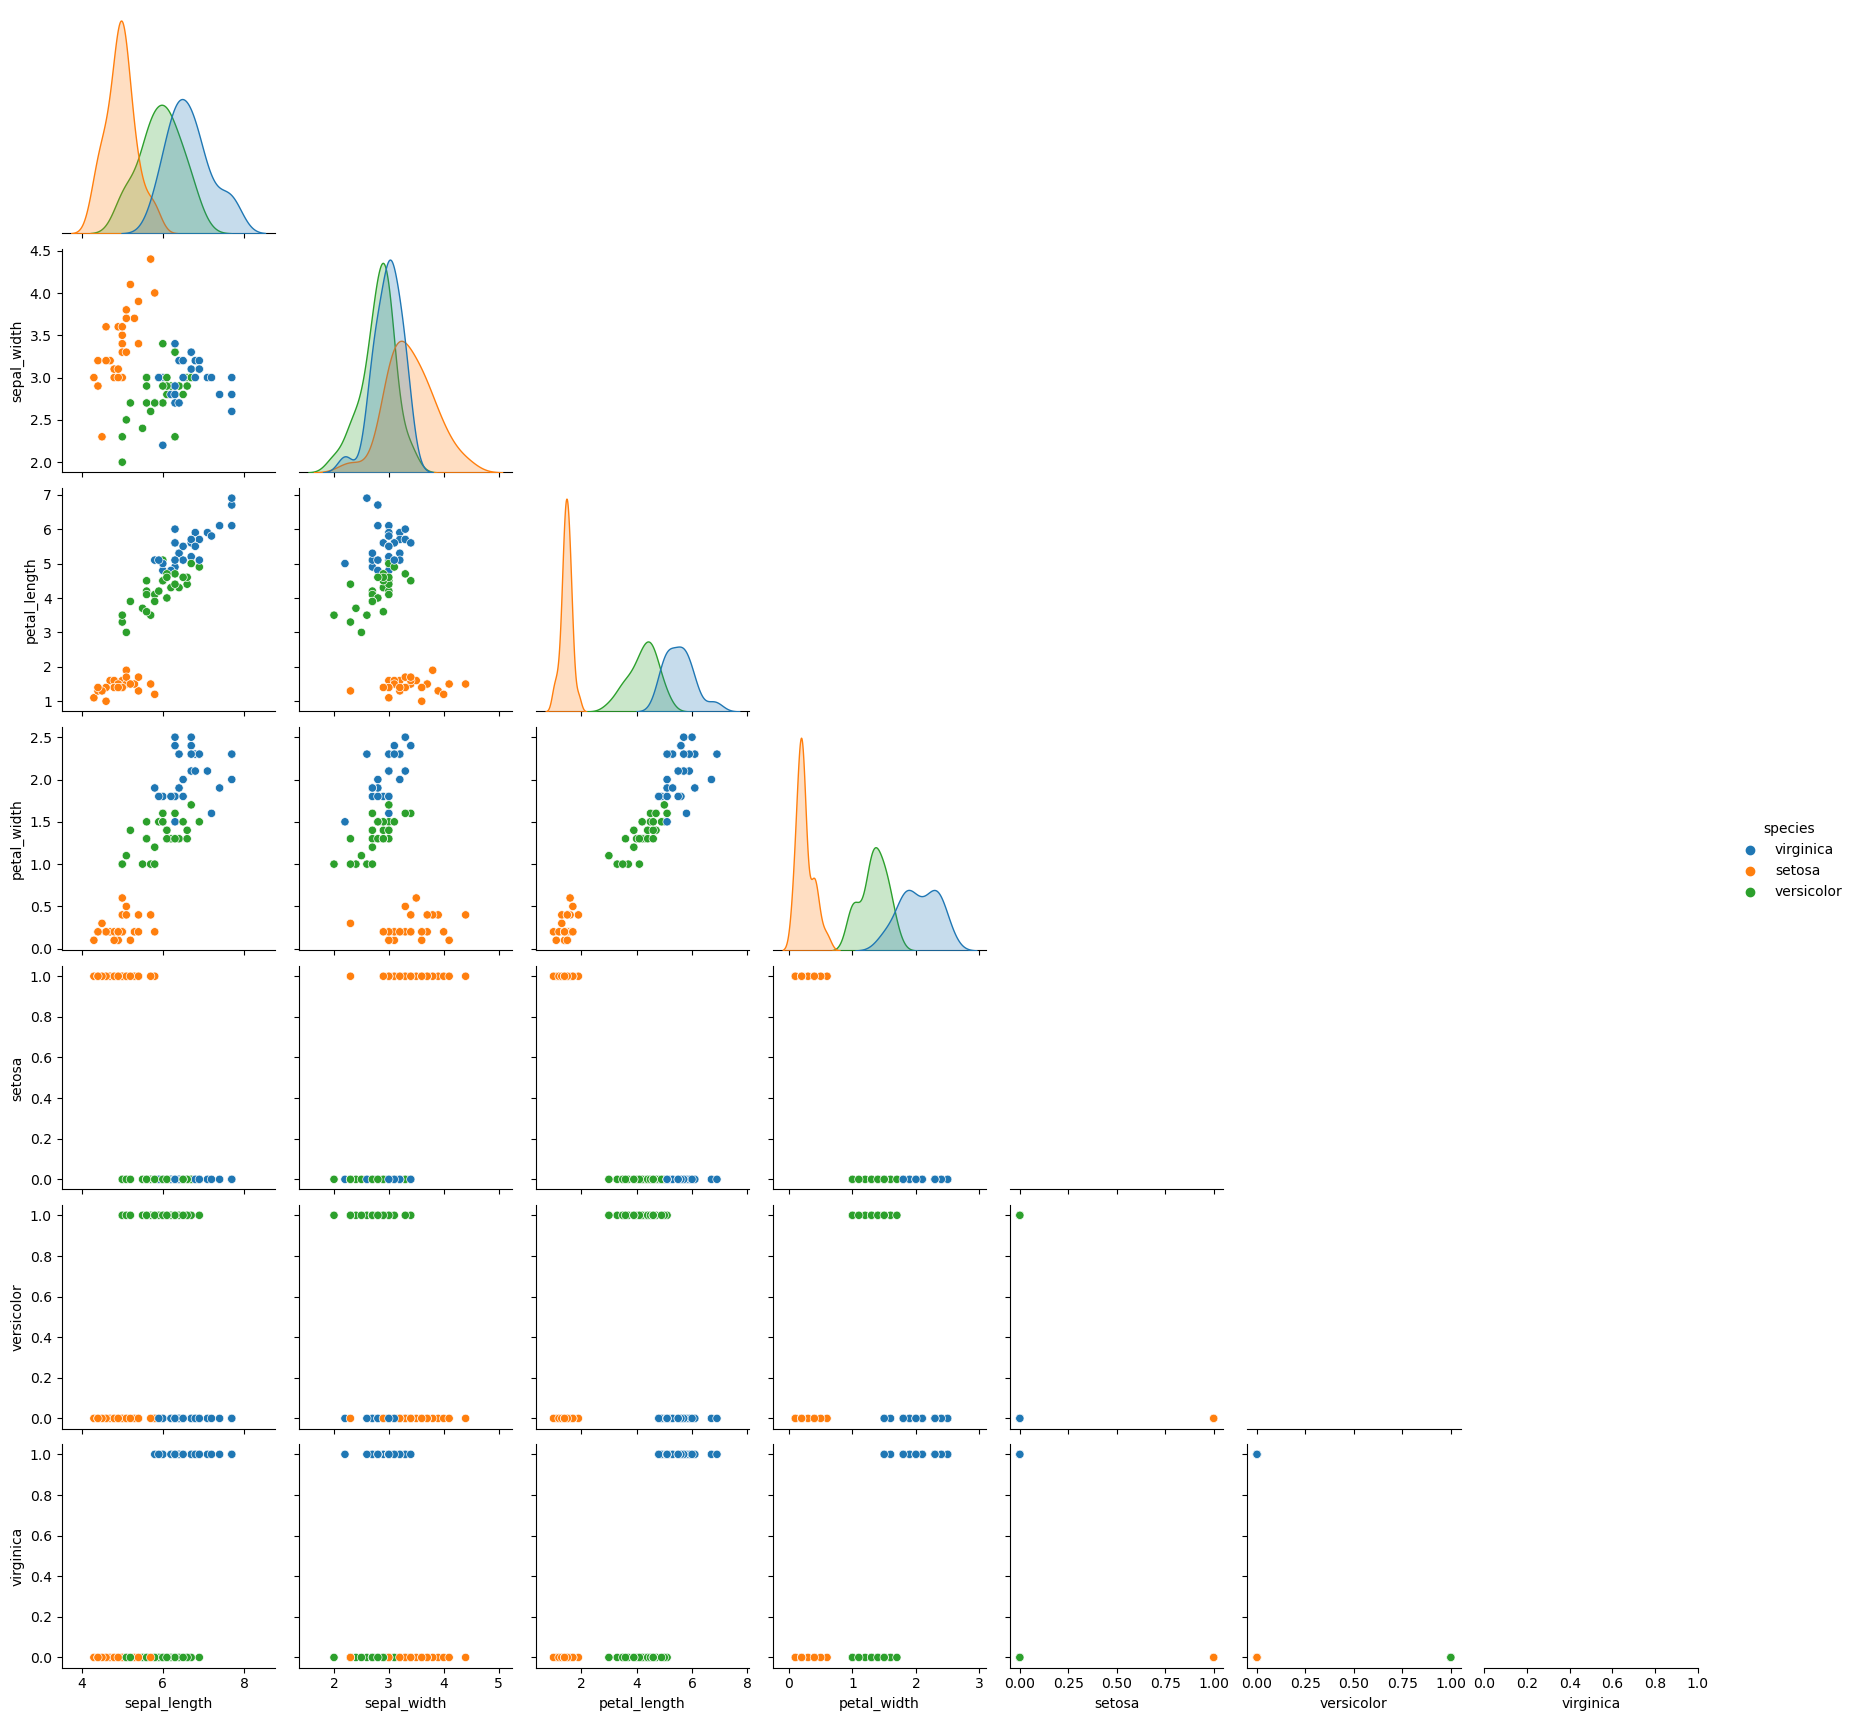

In [470]:
sns.pairplot(data = train_iris, hue= 'species', corner = True)

### Part II
Explore your titanic dataset more completely.

- Determine drivers of the target variable
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.


Does it make sense to combine any features?


Do you find any surprises?


Document any and all findings and takeaways in your notebook using markdown.

### Part III

- Explore your telco data to discover drivers of churn
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.


What are your drivers of churn?


Does it make sense to combine any features?


Do you find any surprises?


Document any and all findings and takeaways in your notebook using markdown.